## In this notebook, I perform statistical significance testing on the Titanic dataset to find whether the socioeconomic class had an effect on the rate of survival.
find my blog post that explains the detailed steps here: https://medium.com/datadriveninvestor/hypothesis-testing-intuitively-explained-using-the-titanic-dataset-in-python-5afa1e580ba6

In [1]:
#import useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
from scipy import stats as st
import seaborn as sn

## I start by loading and examining the data

In [2]:
# Load the data and check the shape:
Data = pd.read_csv('train_titanic.csv')
print('data:',Data.shape)

data: (891, 12)


In [3]:
Data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## The two main variables we are concenred with are "Survived", "Pclass".
- "Survived" is a binary variable that refers to whether that person survivied
- "Pclass": is a categorical variable that refers to the class of the person in the ship (first, second, or third)

It seems safe to assume that rich people were on the first class while poor were on the third but let's check that using the "Fare" variable which refers to how much people paid.

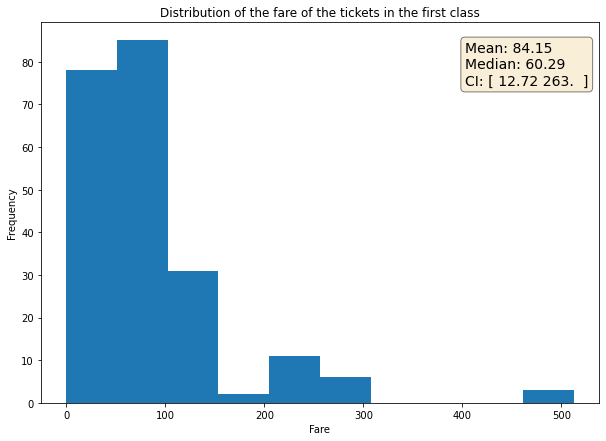

In [4]:
# make histograms of fares over the two classes

first_fares = Data["Fare"][Data["Pclass"]==1]
first_mean = round(np.mean(first_fares), 2)
first_median = round(np.median(first_fares), 2)
first_conf = np.round(np.percentile(first_fares, [2.5, 97.5]), 2)

fig, ax = plt.subplots(figsize = (10, 7))

ax.hist(first_fares)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.text(0.76, 0.95, f"Mean: {first_mean} \nMedian: {first_median} \nCI: {first_conf}", transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of the fare of the tickets in the first class")
plt.show()

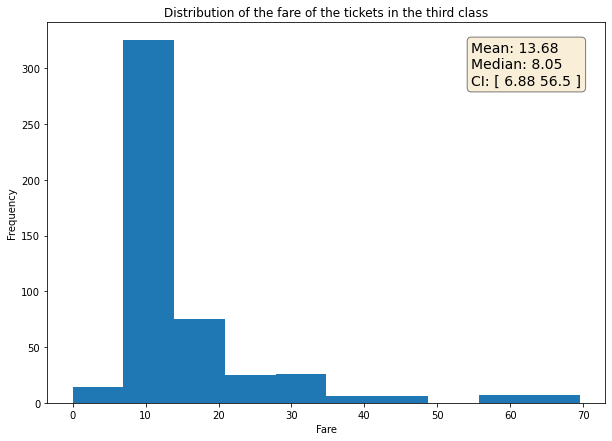

In [5]:
third_fares = Data["Fare"][Data["Pclass"]==3]
third_mean = round(np.mean(third_fares), 2)
third_median = round(np.median(third_fares), 2)
third_conf = np.round(np.percentile(third_fares, [2.5, 97.5]), 2)

fig, ax = plt.subplots(figsize = (10, 7))

ax.hist(third_fares)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.text(0.76, 0.95, f"Mean: {third_mean} \nMedian: {third_median} \nCI: {third_conf}", transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of the fare of the tickets in the third class")
plt.show()

Our assumption seems fair. First class had rich people who paid more and third class had people who paid less.

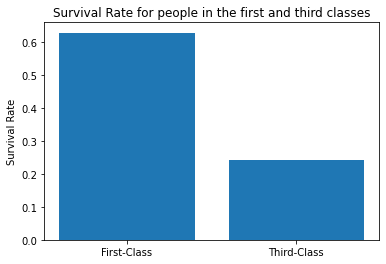

In [6]:
# Compare the survival rate of the two populations

x = ["First-Class", "Third-Class"]
y = [np.mean(Data["Survived"][Data["Pclass"]==1]), np.mean(Data["Survived"][Data["Pclass"]==3])]
plt.bar(x, y)
plt.ylabel("Survival Rate")
plt.title("Survival Rate for people in the first and third classes")
plt.show()

## To make sure the two sample population distributions are normally distributed, let's use the central limit theorem and get a large enough sample to use the Z-test

In [7]:
# get samples using Central Limit Theorem
First_Class_Sample = np.array([np.mean(Data[Data["Pclass"]==1].sample(20)["Survived"].values) for i in range(100)])
third_Class_Sample = np.array([np.mean(Data[Data["Pclass"]==3].sample(20)["Survived"].values) for i in range(100)])

C:\Users\gaber\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gaber\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


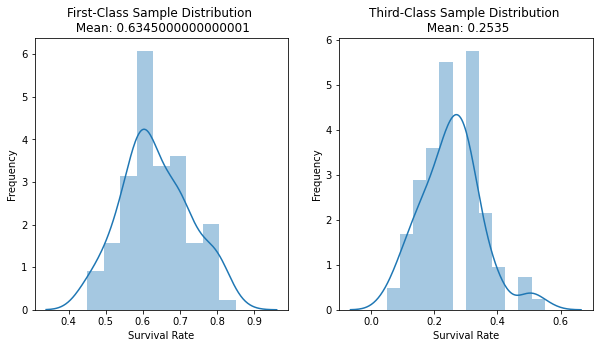

In [8]:
# make plots to check if the distributions are normal.

plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sn.distplot(First_Class_Sample)

plt.title(f"First-Class Sample Distribution \n Mean: {np.mean(First_Class_Sample)}")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")




plt.subplot(1, 2, 2)
sn.distplot(third_Class_Sample)
plt.title(f"Third-Class Sample Distribution \n Mean: {np.mean(third_Class_Sample)}")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")


plt.show()

## Finally, calculate the Z-score and the P-value while assuming a significance level of 0.05.

In [23]:
# calculate the z-score and the p-value

effect = np.mean(First_Class_Sample) - np.mean(third_Class_Sample)
sigma_first = np.std(First_Class_Sample)
sigma_third = np.std(third_Class_Sample)
sigma_difference = np.sqrt((sigma_first**2)/len(First_Class_Sample)  +  (sigma_third**2)/len(third_Class_Sample))
z_score = effect / sigma_difference


In [24]:
# P-value for two-tailed test
st.norm.sf(abs(z_score))*2

0.0

In [19]:
# get samples using Central Limit Theorem
First_Class_Sample = np.array([np.mean(Data[Data["Pclass"]==1].sample(100)["Survived"].values) for i in range(1000)])
third_Class_Sample = np.array([np.mean(Data[Data["Pclass"]==3].sample(100)["Survived"].values) for i in range(1000)])

The P-value is very low and it's safe to reject the null hypothesis.